In [42]:
import pandas as pd

df = pd.read_csv("/Users/jnesnky/Downloads/fails pivot.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1177fa410>]],
      dtype=object)

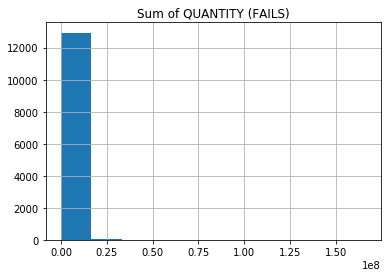

In [43]:
df.hist()

In [3]:
%matplotlib inline

In [5]:
df.head()

,Row Labels,Sum of QUANTITY (FAILS)
0,RBNW,673598466
1,LLKKF,166114479
2,HYSR,127263806
3,BBRW,115176124
4,ZOM,96775397


In [44]:
import numpy as np
df["log"] = np.log(df["Sum of QUANTITY (FAILS)"])

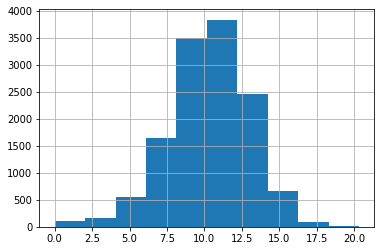

In [7]:
df["log"].hist()

In [45]:
gme = np.log(19351030)

In [9]:
import matplotlib.pyplot as plt

In [41]:
def plot_norm_hist(s, mu, sigma, vline = True, title= True, compare = 0):
    count, bins, ignored = plt.hist(s, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
    
    if compare != 0:
        plt.axvline(compare, color='r')
    
    if vline:
        lline = -1.96*sigma + mu
        uline = 1.96*sigma + mu
        plt.axvline(lline, color='g')
        plt.axvline(uline, color='g')
    

    if title:
        plt.title(f"Normal distribution with mean: {mu:.02f} and StDev: {sigma:.02f}")
    return plt.show()

In [46]:
s = df["log"].values
mu, sigma = np.mean(s), np.std(s)

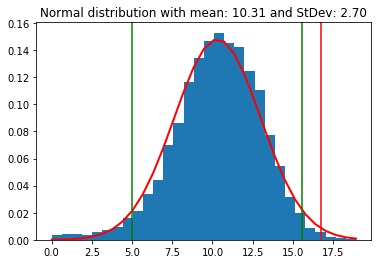

In [47]:
plot_norm_hist(s, mu, sigma, vline=True, title=True, compare = gme)

In [13]:
gme

16.77825620599756

In [21]:
GME = df.loc[df['Row Labels'] == "GME"]["Sum of QUANTITY (FAILS)"]

In [22]:
GME

47    19351030
Name: Sum of QUANTITY (FAILS), dtype: int64

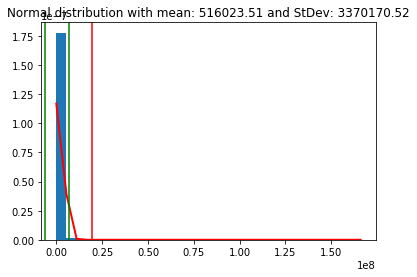

In [49]:
s = df["Sum of QUANTITY (FAILS)"].values
mu, sigma = np.mean(s), np.std(s)

plot_norm_hist(s, mu, sigma, vline=True, title=True, compare = 19351030)

In [50]:
from scipy import stats

In [51]:
stats.ttest_ind(df["log"],gme)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)

In [58]:
def t_test(sample, mu):
    mean = np.mean(sample)
    var = np.var(sample, ddof = 1000) ###
    sem = (var / len(sample)) ** .5
    t = abs(mu - mean)/sem
    df = len(sample) - 1
    p = 2*(1-stats.t.cdf(t, df)) ###
    return (t, p)

In [59]:
t_test(df["log"].values, gme)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.0, 1.0)

In [60]:
def z(df, val):
    mu = np.mean(df)
    sigma = np.std(df)
    count = len(df)
    z = (val-mu)/sigma
    p = 1-stats.norm.cdf(z)
    
    return z, p


In [61]:
z(df["log"].values, gme)

(2.400140353738856, 0.008194393297874636)

In [64]:
z(df["Sum of QUANTITY (FAILS)"].values, 19351030)

(5.588739918787, 1.1436160574085363e-08)

In [63]:
GME

47    19351030
Name: Sum of QUANTITY (FAILS), dtype: int64